In [0]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [0]:
# Support method for plotting svc found online based on Sklearn documentation
# as there are no native methods that i could find for plotting svc in Python
def plot_svc(svc, X, y):
    plt.figure(figsize=(10,10))
    x_min = X[:, 0].min()-0.25
    x_max = X[:, 0].max()+0.25
    y_min = X[:, 1].min()-0.25
    y_max = X[:, 1].max()+0.25
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
    plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='x', s=100, linewidths='1')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

Text(0, 0.5, 'X2')

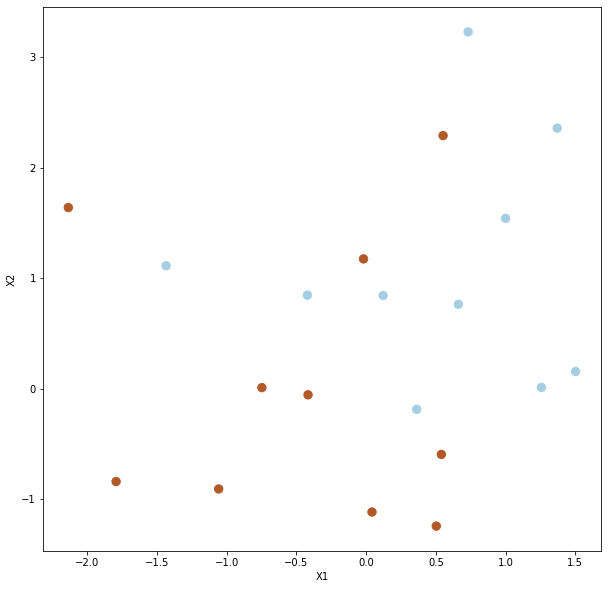

In [292]:
plt.figure(figsize=(10,10))
np.random.seed(2)
X = np.random.randn(20,2)
y = np.repeat([1,-1], 10)
X[y == -1] = X[y == -1]+1
plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

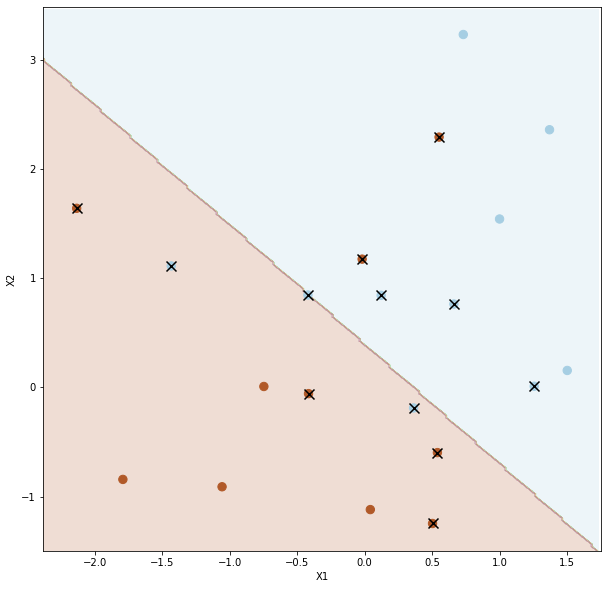

In [293]:
svc = SVC(C=10, kernel='linear')
svc.fit(X, y)
plot_svc(svc, X, y)

In [294]:
print('Number of support vectors: ' , svc.support_.size)
print('Identities' , svc.support_)

Number of support vectors:  12
Identities [10 11 12 13 14 16  0  1  3  5  7  8]


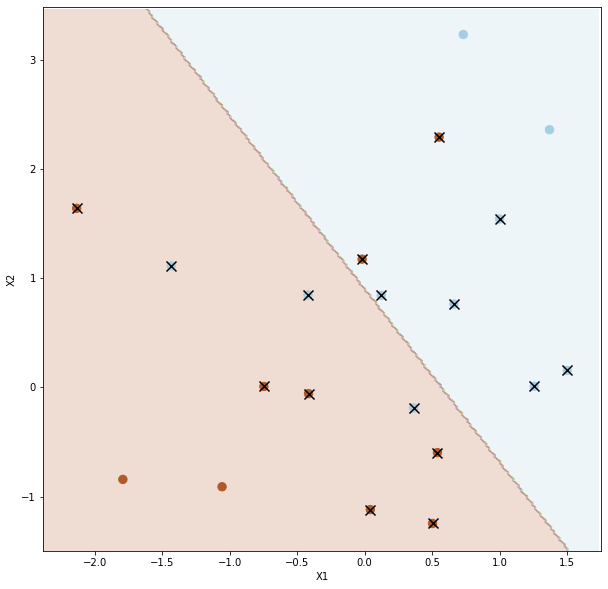

In [295]:
svc = SVC(C=0.1, kernel='linear')
svc.fit(X, y)
plot_svc(svc, X, y)

In [296]:
print('Number of support vectors: ' , svc.support_.size)
print('Identities' , svc.support_)

Number of support vectors:  16
Identities [10 11 12 13 14 16 18 19  0  1  3  5  6  7  8  9]


From the first plot we can see that the classes are not linearly seperable. We implement and fit the support vector classifier with cost 10 and see that alot of data has been poorly seperated. For the first plot we have 12 support vectors which are data points close to the hyperplane that influence its position and orientation. When we lower the cost variable in the second plot we are widening the margin either side of the hyperplane and therefore our number of support vectors increases to 16.      

In [297]:
c_values = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]
clf = GridSearchCV(SVC(kernel='linear'), c_values, cv=10, scoring='accuracy')
clf.fit(X, y)
clf.cv_results_

{'mean_fit_time': array([0.00097852, 0.00085521, 0.00050621, 0.00053034, 0.00053065,
        0.00062404, 0.00082426]),
 'mean_score_time': array([0.00084929, 0.00064971, 0.00038738, 0.00038342, 0.00036645,
        0.00043955, 0.00043356]),
 'mean_test_score': array([0.7 , 0.7 , 0.6 , 0.7 , 0.75, 0.75, 0.75]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 5, 10, 100],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 5},
  {'C': 10},
  {'C': 100}],
 'rank_test_score': array([4, 4, 7, 4, 1, 1, 1], dtype=int32),
 'split0_test_score': array([1., 1., 1., 1., 1., 1., 1.]),
 'split1_test_score': array([0.5, 0.5, 0. , 0.5, 1. , 1. , 1. ]),
 'split2_test_score': array([1., 1., 1., 1., 1., 1., 1.]),
 'split3_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'split4_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'split5_test_sc

In [298]:
best_cost = clf.best_params_
print(best_cost)

{'C': 5}


We perform cross validation for different values of C in order to determine which C value results in the highest accuracy. The results show us the mean fit time, mean score time and mean test score and also the standard deviation for all of them, based on this the best cost (C) parameter is determined to be 5. 

In [0]:
X_test = np.random.randn(20,2)
y_test = np.random.choice([-1,1], 20)
X_test[y_test == 1] = X_test[y_test == 1]-1

In [300]:
svc2 = SVC(C=5, kernel='linear')
svc2.fit(X, y)
y_pred = svc2.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred), index=svc2.classes_, columns=svc2.classes_)

,-1,1
-1,8,4
1,0,8


Using the best model obtained we perform a prediction on data sample. From the confusion matrix we can see that the model was correct 16/20 times, giving us an accuracy of 80%

Text(0, 0.5, 'X2')

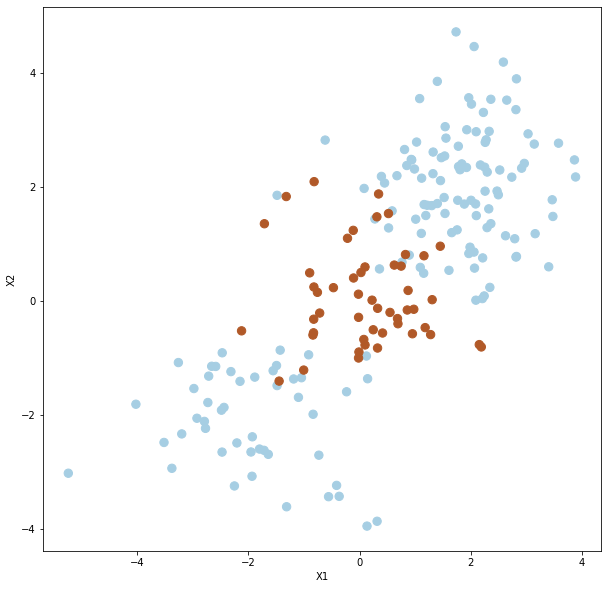

In [301]:
plt.figure(figsize=(10,10))
np.random.seed(42)
X = np.random.randn(200,2)
X[:100] = X[:100] +2
X[101:150] = X[101:150]-2
y = np.concatenate([np.repeat(-1, 150), np.repeat(1,50)])
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=2)
plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

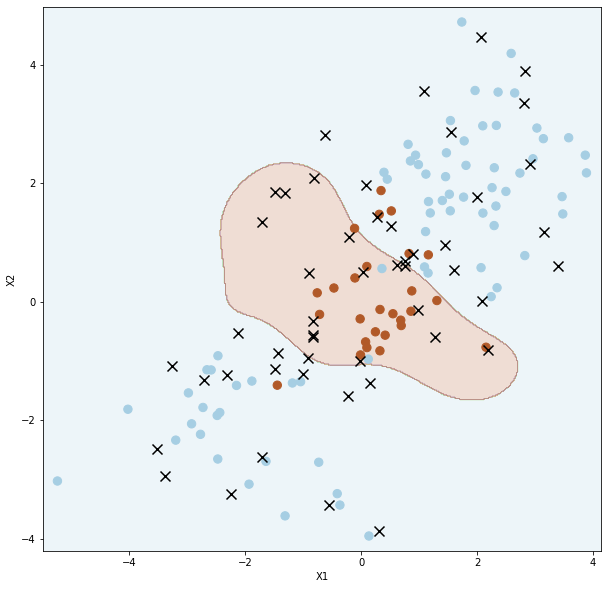

In [302]:
svm = SVC(C=1.0, kernel='rbf', gamma=1)
svm.fit(X_train, y_train)
plot_svc(svm, X_test, y_test)

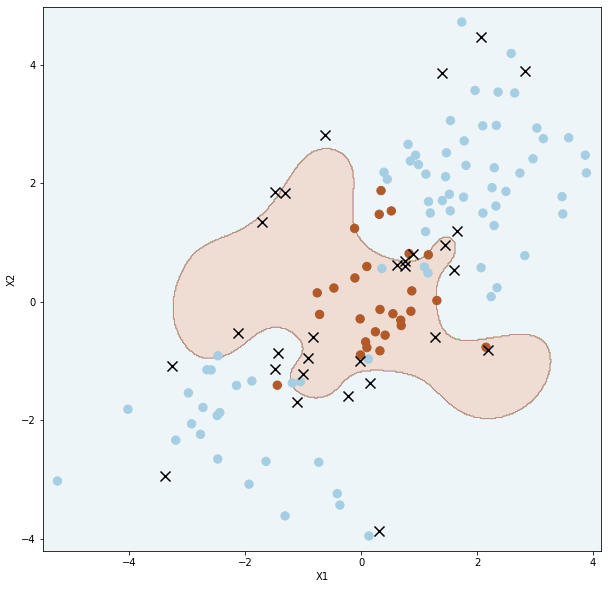

In [303]:
svm2 = SVC(C=100, kernel='rbf', gamma=1)
svm2.fit(X_train, y_train)
plot_svc(svm2, X_test, y_test)

In [304]:
parameters = [{'C': [0.01, 0.1, 1, 10, 100],'gamma': [0.5, 1,2,3,4]}]
clf = GridSearchCV(SVC(kernel='rbf'), parameters, cv=10, scoring='accuracy')
clf.fit(X_train, y_train)
print(clf.best_params_)

{'C': 1, 'gamma': 0.5}


From the two plots we can see how a higher value of C produces a more irregular boundary between the classes as the penalty for misclassification becomes higher. The gamma variable controls how closely the model will try to fit the training set, the higher the variable is the more closely the training set will be fitted, however we risk overfitting. We again perform a cross validation for different values of C and gamma in order to find the values resulting in the highest accuracy. According to the results the best performing parameters are C=1 and gamma =0.5

In [305]:
pd.DataFrame(confusion_matrix(y_test, clf.best_estimator_.predict(X_test)), index=clf.classes_, columns=clf.classes_)

,-1,1
-1,71,2
1,6,21


The confustion matrix shows us that we had 92 correct predictions out of 100 giving us a 92% accuracy with the model using best performing parameters

Text(0, 0.5, 'XX2')

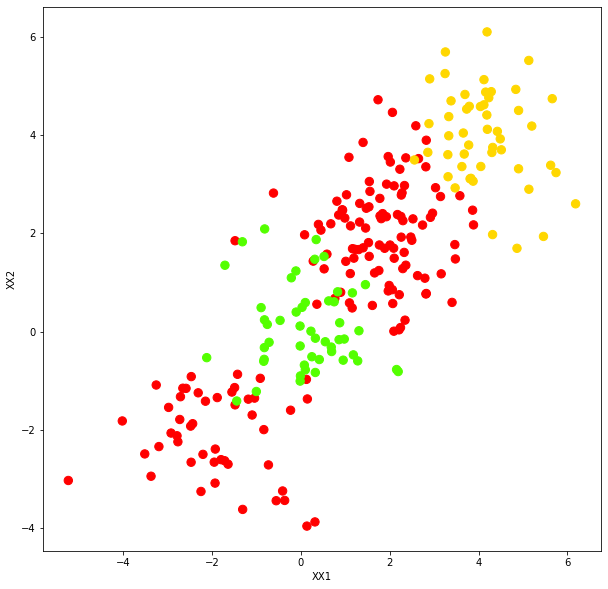

In [306]:
plt.figure(figsize=(10,10))
np.random.seed(1)
XX = np.vstack([X, np.random.randn(50,2)])
yy = np.hstack([y, np.repeat(0,50)])
XX[yy ==0] = XX[yy == 0] +4

plt.scatter(XX[:,0], XX[:,1], s=70, c=yy, cmap=plt.cm.prism)
plt.xlabel('XX1')
plt.ylabel('XX2')

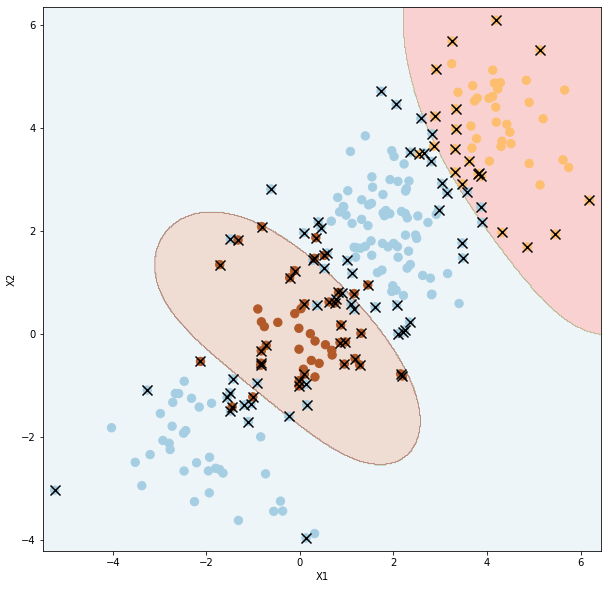

In [307]:
svm5 = SVC(C=1, kernel='rbf')
model = svm5.fit(XX, yy)
plot_svc(svm5, XX, yy)

In [308]:
tuned_parameters = [{'C': [0.01, 0.1, 1, 10, 100],'gamma': [0.5, 1,2,3,4]}]
clf = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=10, scoring='accuracy')
model = clf.fit(XX, yy)
print(clf.best_params_)

{'C': 1, 'gamma': 1}


In [309]:
pd.DataFrame(confusion_matrix(yy, clf.best_estimator_.predict(XX)), index=svm5.classes_, columns=svm5.classes_)

,-1,0,1
-1,147,0,3
0,2,48,0
1,9,0,41


We had performed cross validation again after we had added a third class and found the best performing parameters in terms of accuracy to be C = 1 and gamma = 1. From the perdiction matrix we can see that we had 236 correct predictions out of 250 giving us an accuracy of 94.4%

In [310]:
# The Khan.csv dataset could not be read, therefore i will be using these seperated datasets
# found online and will be including them in my submission. 
X_train = pd.read_csv('Khan_xtrain.csv').drop('Unnamed: 0', axis=1)
y_train = pd.read_csv('Khan_ytrain.csv').drop('Unnamed: 0', axis=1).as_matrix().ravel() 
X_test = pd.read_csv('Khan_xtest.csv').drop('Unnamed: 0', axis=1)
y_test = pd.read_csv('Khan_ytest.csv').drop('Unnamed: 0', axis=1).as_matrix().ravel()
print(len(X_train.columns))
print(X_train.columns)

2308
Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       ...
       'V2299', 'V2300', 'V2301', 'V2302', 'V2303', 'V2304', 'V2305', 'V2306',
       'V2307', 'V2308'],
      dtype='object', length=2308)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [311]:
print(X_train.shape[0])
print(X_test.shape[0])

63
20


In [312]:
X_train.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,...,V2269,V2270,V2271,V2272,V2273,V2274,V2275,V2276,V2277,V2278,V2279,V2280,V2281,V2282,V2283,V2284,V2285,V2286,V2287,V2288,V2289,V2290,V2291,V2292,V2293,V2294,V2295,V2296,V2297,V2298,V2299,V2300,V2301,V2302,V2303,V2304,V2305,V2306,V2307,V2308
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,...,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,0.146931,-1.739001,-0.248668,-1.078090,-1.385706,0.517289,1.552154,0.095126,0.162019,0.345152,1.640225,-0.256504,1.551577,0.452599,-0.050971,-0.471535,-0.010003,0.742680,-0.265825,0.063735,0.370083,1.727130,-0.823334,1.314560,1.010388,1.579801,-0.115038,0.181263,-1.174879,0.038668,-0.648583,-0.088408,-1.280623,0.715939,1.239896,0.612444,-0.494425,-0.785889,-0.658621,-1.104513,...,-2.013339,-0.034868,-1.321496,-0.215358,-0.690547,-0.291652,-1.597132,-0.479648,0.669354,-1.511462,-0.727657,-0.377803,-0.440027,-1.187398,-0.175603,-0.996542,-0.457527,-1.110936,-0.293875,-0.987459,-0.753592,-1.196636,-0.542352,0.268266,-0.986262,-1.186642,-0.935842,-0.976640,-1.607265,-0.736477,-0.436448,-0.443471,-1.365441,-0.653703,-0.477985,-1.857011,-1.741823,-1.067887,-0.507258,-1.566933
std,0.853339,0.905571,0.701464,1.190656,0.653898,0.661113,0.365211,0.488837,0.434185,0.520687,0.339215,0.490070,0.388607,0.530682,0.521604,0.570083,0.416855,0.473242,0.875785,0.626052,0.467271,0.304537,0.609306,0.511328,0.636683,0.285567,0.718461,0.506359,0.700779,0.570521,0.457194,0.501280,1.413536,0.410108,0.408451,0.477879,0.587777,0.659375,0.439577,0.483432,...,0.647406,0.682662,0.692440,0.520824,1.077211,0.541712,0.717542,0.616859,0.461291,0.624129,0.713741,0.462734,0.655657,0.554390,0.474910,0.557286,0.524220,0.493857,0.607108,0.875290,0.575742,1.349694,0.518213,0.719304,0.727381,0.774386,0.828693,0.501888,0.894888,0.596473,0.648043,0.640036,0.706647,0.545154,1.006027,0.930764,0.898833,0.579749,0.577504,0.632065
min,-2.683846,-3.007805,-1.851509,-2.956512,-3.216379,-1.118101,0.776063,-1.218072,-0.639227,-1.572142,0.960537,-1.804845,-0.297059,-1.791559,-1.212005,-2.209095,-1.161552,-0.676290,-2.088280,-1.913249,-0.782853,1.115732,-3.172469,-0.673345,-1.635782,1.050367,-1.821394,-1.109572,-3.119030,-1.191057,-1.591107,-1.254214,-3.973898,-0.327671,-0.077205,-0.430475,-1.861753,-2.995732,-1.874706,-2.311626,...,-4.062846,-2.487711,-3.473768,-1.336743,-3.661264,-2.826834,-3.540459,-1.989235,-0.622130,-2.509609,-2.545931,-2.006935,-2.045620,-2.629701,-1.087672,-2.517017,-2.147292,-2.507152,-2.200931,-4.699481,-2.200029,-4.074542,-1.839480,-2.044847,-3.780995,-3.338223,-2.538307,-2.162823,-3.550858,-2.073857,-2.276917,-2.226550,-2.847312,-2.107018,-2.950759,-4.803621,-5.496768,-3.146555,-2.691193,-3.110021
25%,-0.081323,-2.427080,-0.634168,-2.121514,-1.860178,0.086846,1.288394,-0.321716,-0.123633,0.052318,1.404901,-0.441154,1.399193,0.143789,-0.491260,-0.766272,-0.244967,0.419296,-0.923316,-0.147005,0.028295,1.527662,-1.104604,1.159223,0.785000,1.422118,-0.637626,-0.102006,-1.761271,-0.297627,-0.978568,-0.401911,-2.461591,0.481623,1.023492,0.261933,-0.875269,-1.089996,-0.939817,-1.330587,...,-2.447035,-0.342993,-1.793720,-0.570307,-1.502881,-0.528531,-2.037930,-0.925091,0.2

In [313]:
svc = SVC(kernel='linear') 
svc.fit(X_train, y_train)
cm = confusion_matrix(y_train, svc.predict(X_train))
cm_df = pd.DataFrame(cm.T, index=svc.classes_, columns=svc.classes_) 
print(cm_df)

   1   2   3   4
1  8   0   0   0
2  0  23   0   0
3  0   0  12   0
4  0   0   0  20


In [314]:
cm = confusion_matrix(y_test, svc.predict(X_test))
print(pd.DataFrame(cm.T, index=svc.classes_, columns=svc.classes_))

   1  2  3  4
1  3  0  0  0
2  0  6  2  0
3  0  0  4  0
4  0  0  0  5


From the first matrix we can see that we had no training prediction errors. This is as stated in the assignment because we have a large number of features relative to the number of observations which means the classes are easily seperable. It is also because we are predicting on the same data that the model was fitted on. The second matrix shows us predictions on the test data from which we can see that we had 18 out of 20 perdictions correct, giving us an accuracy of 90%. 